# Question 1

### Introduction:
### Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.


In [48]:
# Import the necessary library
import pandas as pd

# Step 1: Import the pandas library
# We start by importing the pandas library, which is used for data manipulation and analysis.

# Step 2: Import the dataset
# We retrieve a dataset containing user information from a remote source using its URL.
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(url, sep='|', index_col='user_id')

# Step 3: Calculate the mean age per occupation
# We group the users by their occupation and calculate the average age for each occupation group.
mean_age_per_occupation = users.groupby('occupation')['age'].mean()
print("**Mean Age per Occupation:**")
print(mean_age_per_occupation.to_markdown())
print("\n")

# Step 4: Calculate the Male ratio per occupation and sort it
# We define a function to compute the ratio of males in a given group, and then apply this function to each occupation group.
def male_ratio(group):
    return (group == 'M').sum() / group.count()

male_ratio_per_occupation = users.groupby('occupation')['gender'].apply(male_ratio)
sorted_male_ratio = male_ratio_per_occupation.sort_values(ascending=False)
print("**Male Ratio per Occupation (Sorted):**")
print(sorted_male_ratio.to_markdown())
print("\n")

# Step 5: Calculate the minimum and maximum ages per occupation
# We group the users by their occupation and calculate the minimum and maximum age for each group.
age_range_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])
print("**Age Range per Occupation:**")
print(age_range_per_occupation.to_markdown())
print("\n")

# Step 6: Calculate the mean age per combination of occupation and sex
# We group the users by both occupation and gender, then calculate the average age for each combination.
mean_age_per_combination = users.groupby(['occupation', 'gender'])['age'].mean()
print("**Mean Age per Occupation and Gender:**")
print(mean_age_per_combination.to_markdown())
print("\n")

# Step 7: Calculate the percentage of women and men per occupation
# We define a function to calculate the percentage of women and men in a group and then apply it to each occupation group.
def gender_percentage(group):
    total_count = group.count()
    women_count = (group == 'F').sum()
    men_count = total_count - women_count
    women_percentage = (women_count / total_count) * 100
    men_percentage = (men_count / total_count) * 100
    return pd.Series({'Women %': women_percentage, 'Men %': men_percentage})

gender_percentage_per_occupation = users.groupby('occupation')['gender'].apply(gender_percentage)
gender_percentage_per_occupation = gender_percentage_per_occupation.reset_index()  # Reset index for formatting

print("**Gender Percentage per Occupation:**")
print(gender_percentage_per_occupation.to_markdown(index=False))  # Exclude index column from display


**Mean Age per Occupation:**
| occupation    |     age |
|:--------------|--------:|
| administrator | 38.7468 |
| artist        | 31.3929 |
| doctor        | 43.5714 |
| educator      | 42.0105 |
| engineer      | 36.3881 |
| entertainment | 29.2222 |
| executive     | 38.7188 |
| healthcare    | 41.5625 |
| homemaker     | 32.5714 |
| lawyer        | 36.75   |
| librarian     | 40      |
| marketing     | 37.6154 |
| none          | 26.5556 |
| other         | 34.5238 |
| programmer    | 33.1212 |
| retired       | 63.0714 |
| salesman      | 35.6667 |
| scientist     | 35.5484 |
| student       | 22.0816 |
| technician    | 33.1481 |
| writer        | 36.3111 |


**Male Ratio per Occupation (Sorted):**
| occupation    |   gender |
|:--------------|---------:|
| doctor        | 1        |
| engineer      | 0.970149 |
| technician    | 0.962963 |
| retired       | 0.928571 |
| programmer    | 0.909091 |
| executive     | 0.90625  |
| scientist     | 0.903226 |
| entertainment | 0.8888

# Question 2

### Euro Teams

In [55]:
import pandas as pd

# Step 1: Import the pandas library
import pandas as pd

# Step 2: Load the Euro 2012 dataset
data_url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro_2012_data = pd.read_csv(data_url)

# Step 3: Select only the 'Goals' column
goals_column = euro_2012_data['Goals']
print("**Goals Column:**")
print(goals_column.to_markdown())
print("\n")

# Step 4: Determine the number of participating teams in Euro 2012
num_participating_teams = euro_2012_data['Team'].nunique()
print("**Number of Participating Teams in Euro 2012:**", num_participating_teams)
print("\n")

# Step 5: Calculate the number of columns in the dataset
num_columns = euro_2012_data.shape[1]
print("**Number of Columns in the Dataset:**", num_columns)
print("\n")

# Step 6: Extract the columns 'Team', 'Yellow Cards', and 'Red Cards'
discipline_data = euro_2012_data[['Team', 'Yellow Cards', 'Red Cards']]
print("**Discipline Dataframe:**")
print(discipline_data.to_markdown())
print("\n")

# Step 7: Sort the teams based on 'Red Cards' and then 'Yellow Cards'
sorted_discipline_data = discipline_data.sort_values(by=['Red Cards', 'Yellow Cards'])
print("**Sorted Discipline Dataframe:**")
print(sorted_discipline_data.to_markdown())
print("\n")

# Step 8: Calculate the mean number of Yellow Cards per team
mean_yellow_cards_per_team = euro_2012_data.groupby('Team')['Yellow Cards'].mean().reset_index()
print("**Mean Yellow Cards per Team:**")
print(mean_yellow_cards_per_team.to_markdown(index=False))
print("\n")

# Step 9: Filter and select teams that scored more than 6 goals
high_scoring_teams = euro_2012_data[euro_2012_data['Goals'] > 6][['Team', 'Goals']]
print("**Teams That Scored More Than 6 Goals:**")
print(high_scoring_teams.to_markdown(index=False))
print("\n")

# Step 10: Select teams whose names start with 'G'
teams_starting_with_G = euro_2012_data[euro_2012_data['Team'].str.startswith('G')]['Team']
print("**Teams Starting with 'G':**")
print(teams_starting_with_G.to_markdown(index=False))
print("\n")

# Step 11: Select the first 7 columns of the dataset
first_7_columns_data = euro_2012_data.iloc[:, :7]
print("**First 7 Columns of the Dataset:**")
print(first_7_columns_data.to_markdown())
print("\n")

# Step 12: Select all columns except the last 3 columns
all_columns_except_last_3_data = euro_2012_data.iloc[:, :-3]
print("**All Columns Except the Last 3 Columns:**")
print(all_columns_except_last_3_data.to_markdown())
print("\n")

# Step 13: Display the 'Shooting Accuracy' for England, Italy, and Russia
selected_teams = ['England', 'Italy', 'Russia']
shooting_accuracy_selected_teams = euro_2012_data[euro_2012_data['Team'].isin(selected_teams)][['Team', 'Shooting Accuracy']]
print("**Shooting Accuracy for England, Italy, and Russia:**")
print(shooting_accuracy_selected_teams.to_markdown())
print("\n")


**Goals Column:**
|    |   Goals |
|---:|--------:|
|  0 |       4 |
|  1 |       4 |
|  2 |       4 |
|  3 |       5 |
|  4 |       3 |
|  5 |      10 |
|  6 |       5 |
|  7 |       6 |
|  8 |       2 |
|  9 |       2 |
| 10 |       6 |
| 11 |       1 |
| 12 |       5 |
| 13 |      12 |
| 14 |       5 |
| 15 |       2 |


**Number of Participating Teams in Euro 2012:** 16


**Number of Columns in the Dataset:** 35


**Discipline Dataframe:**
|    | Team                |   Yellow Cards |   Red Cards |
|---:|:--------------------|---------------:|------------:|
|  0 | Croatia             |              9 |           0 |
|  1 | Czech Republic      |              7 |           0 |
|  2 | Denmark             |              4 |           0 |
|  3 | England             |              5 |           0 |
|  4 | France              |              6 |           0 |
|  5 | Germany             |              4 |           0 |
|  6 | Greece              |              9 |           1 |
|  7 | Italy

# Question 3 

### Housing


In [6]:
import pandas as pd
import numpy as np
from tabulate import tabulate

# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from tabulate import tabulate

# Step 2: Create three different Series for data
bedroom_series = pd.Series(np.random.randint(1, 5, size=100))
bathroom_series = pd.Series(np.random.randint(1, 4, size=100))
price_series = pd.Series(np.random.randint(10000, 30001, size=100))

# Step 3: Create a DataFrame by joining the Series by columns
data_df = pd.concat([bedroom_series, bathroom_series, price_series], axis=1)
data_df.columns = ['bedrooms', 'bathrooms', 'price_per_square_meter']

# Step 4: Change the column names
data_df.columns = ['bedrooms', 'bathrooms', 'price_per_square_meter']

# Step 5: Create a one-column DataFrame by combining the values of the three Series
big_column_df = pd.concat([bedroom_series, bathroom_series, price_series], ignore_index=True)

# Step 6: Verify if the DataFrame's last index is 99
print("Does the DataFrame have an index up to 99?", big_column_df.index.max() == 99)
print("\n")

# Step 7: Reindex the DataFrame to have indices from 0 to 299
big_column_df = big_column_df.reindex(range(300))

# Print the DataFrames using tabulate
print("Data DataFrame:")
print(tabulate(data_df, headers='keys', tablefmt='grid'))
print("\n")

print("Big Column DataFrame:")
print(tabulate(big_column_df.to_frame(), headers=['value'], tablefmt='grid'))


Does the DataFrame have an index up to 99? False


Data DataFrame:
+----+------------+-------------+--------------------------+
|    |   bedrooms |   bathrooms |   price_per_square_meter |
+====+============+=============+==========================+
|  0 |          1 |           2 |                    24035 |
+----+------------+-------------+--------------------------+
|  1 |          2 |           3 |                    15993 |
+----+------------+-------------+--------------------------+
|  2 |          2 |           1 |                    15788 |
+----+------------+-------------+--------------------------+
|  3 |          3 |           3 |                    19505 |
+----+------------+-------------+--------------------------+
|  4 |          4 |           3 |                    12959 |
+----+------------+-------------+--------------------------+
|  5 |          2 |           3 |                    17185 |
+----+------------+-------------+--------------------------+
|  6 |          2 

# Question 4

### Wind Statistics

In [60]:
from matplotlib import pyplot as plt
import numpy as np

import pandas as pd
data = pd.read_csv("/Users/mayankkhosla/Desktop/python/PS3/wind.txt", sep=" ")
print(data)

data = data.rename(columns={'Yr': 'year', 'Mo': 'month','Dy': 'day'})


      Yr    Mo    Dy  Unnamed: 3  Unnamed: 4    RPT  Unnamed: 6  Unnamed: 7  \
0     61   NaN   1.0         NaN        1.00  15.04       14.96       13.17   
1     61   NaN   1.0         NaN        2.00  14.71         NaN         NaN   
2     61   NaN   1.0         NaN        3.00  18.50       16.88       12.33   
3     61   NaN   1.0         NaN        4.00  10.58         NaN        6.63   
4     61   NaN   1.0         NaN        5.00  13.33       13.25       11.42   
...   ..   ...   ...         ...         ...    ...         ...         ...   
6569  78  12.0  27.0       17.58       16.96  17.62         NaN        8.08   
6570  78  12.0  28.0       13.21         NaN   5.46       13.46         NaN   
6571  78  12.0  29.0       14.00       10.29  14.42         NaN        8.71   
6572  78  12.0  30.0       18.50       14.04  21.29         NaN        9.13   
6573  78  12.0  31.0       20.33       17.41  27.29         NaN        9.59   

        VAL  Unnamed: 9  ...  MUL  Unnamed: 30  Unn

In [85]:
import pandas as pd

# Read the dataset
data = pd.read_csv("/Users/mayankkhosla/Desktop/python/PS3/wind.txt", sep=" ")

# Function to fix year values
def fix_year(year):
    if year >= 90:
        return 1900 + year
    else:
        return 2000 + year

# Apply the function to the 'Yr' column
data['Yr'] = data['Yr'].apply(fix_year)

# Rename columns
data = data.rename(columns={'Yr': 'year', 'Mo': 'month', 'Dy': 'day'})

# Create a new 'date' column by combining year, month, and day columns
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

# Set the 'date' column as the index
data.set_index('date', inplace=True)

# Display the first few rows of the dataset
print(data.head())

# Count missing values for each location
missing_values_per_location = data.isnull().sum()

# Display the missing values count
print("**Missing Values Count Per Location:**")
print(missing_values_per_location)

# Count non-missing values in the entire dataset
total_non_missing_values = data.notnull().sum().sum()

# Display the total number of non-missing values
print("**Total Number of Non-Missing Values:**", total_non_missing_values)

# Calculate the mean windspeed over all locations and times
mean_windspeed = data.mean().mean()

# Display the mean windspeed
print("**Mean Windspeed Over All Locations and Times:**", mean_windspeed)

# Calculate statistics for each location
loc_stats = pd.DataFrame({
    'min': data.min(),
    'max': data.max(),
    'mean': data.mean(),
    'std': data.std()
})

# Display the loc_stats DataFrame
print("**Statistics for Windspeed at Each Location:**")
print(loc_stats)

# Calculate statistics for each day
day_stats = data.resample('D').agg({
    'RPT': ['min', 'max', 'mean', 'std'],
    'VAL': ['min', 'max', 'mean', 'std'],
    'ROS': ['min', 'max', 'mean', 'std'],
    'KIL': ['min', 'max', 'mean', 'std'],
    'SHA': ['min', 'max', 'mean', 'std'],
    'BIR': ['min', 'max', 'mean', 'std'],
    'DUB': ['min', 'max', 'mean', 'std'],
    'CLA': ['min', 'max', 'mean', 'std'],
    'MUL': ['min', 'max', 'mean', 'std'],
    'CLO': ['min', 'max', 'mean', 'std'],
    'BEL': ['min', 'max', 'mean', 'std'],
    'MAL': ['min', 'max', 'mean', 'std']
})

# Display the day_stats DataFrame
print("**Statistics for Windspeed Across All Locations Each Day:**")
print(day_stats)

# Downsample to yearly frequency for each location
yearly_data = data.resample('Y').mean()

# Display the yearly_data DataFrame
print("**Yearly Downsampled Data for Each Location:**")
print(yearly_data)

# Downsample to monthly frequency for each location
monthly_data = data.resample('M').mean()

# Display the monthly_data DataFrame
print("**Monthly Downsampled Data for Each Location:**")
print(monthly_data)

# Downsample to weekly frequency for each location
weekly_data = data.resample('W').mean()

# Display the weekly_data DataFrame
print("**Weekly Downsampled Data for Each Location:**")
print(weekly_data)

# Downsample to weekly frequency and calculate statistics
weekly_stats = data.resample('W').agg({
    'RPT': ['min', 'max', 'mean', 'std'],
    'VAL': ['min', 'max', 'mean', 'std'],
    'ROS': ['min', 'max', 'mean', 'std'],
    'KIL': ['min', 'max', 'mean', 'std'],
    'SHA': ['min', 'max', 'mean', 'std'],
    'BIR': ['min', 'max', 'mean', 'std'],
    'DUB': ['min', 'max', 'mean', 'std'],
    'CLA': ['min', 'max', 'mean', 'std'],
    'MUL': ['min', 'max', 'mean', 'std'],
    'CLO': ['min', 'max', 'mean', 'std'],
    'BEL': ['min', 'max', 'mean', 'std'],
    'MAL': ['min', 'max', 'mean', 'std']
})

# Display the weekly_stats DataFrame
print("**Weekly Statistics for Windspeed Across All Locations:**")
print(weekly_stats)


      year  month  day  Unnamed: 3  Unnamed: 4    RPT  Unnamed: 6  Unnamed: 7  \
date                                                                            
NaT   2061    NaN  1.0         NaN         1.0  15.04       14.96       13.17   
NaT   2061    NaN  1.0         NaN         2.0  14.71         NaN         NaN   
NaT   2061    NaN  1.0         NaN         3.0  18.50       16.88       12.33   
NaT   2061    NaN  1.0         NaN         4.0  10.58         NaN        6.63   
NaT   2061    NaN  1.0         NaN         5.0  13.33       13.25       11.42   

        VAL  Unnamed: 9  ...  MUL  Unnamed: 30  Unnamed: 31  CLO  Unnamed: 33  \
date                     ...                                                    
NaT     NaN        9.29  ...  NaN          NaN          NaN  NaN          NaN   
NaT     NaN       10.83  ...  NaN          NaN          NaN  NaN          NaN   
NaT   10.13       11.17  ...  NaN          NaN          NaN  NaN          NaN   
NaT   11.75         NaN  ..

# Question 5

In [7]:
import pandas as pd
from tabulate import tabulate

# Step 1: Import the necessary libraries
import pandas as pd
from tabulate import tabulate

# Step 2: Load the dataset from a remote URL
data_url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipotle_data = pd.read_csv(data_url, sep='\t')

# Step 3: Display the first 10 entries
print("**Step 3: Display the First 10 Entries**")
print(tabulate(chipotle_data.head(10), headers='keys', tablefmt='grid'))
print("\n")

# Step 4: Calculate the number of observations in the dataset
num_observations = chipotle_data.shape[0]
print("**Step 4: Number of Observations in the Dataset:**", num_observations)
print("\n")

# Step 5: Calculate the number of columns in the dataset
num_columns = chipotle_data.shape[1]
print("**Step 5: Number of Columns in the Dataset:**", num_columns)
print("\n")

# Step 6: Display the names of all the columns
print("**Step 6: Column Names:**")
print(tabulate(pd.DataFrame(chipotle_data.columns, columns=['Column Name']), headers='keys', tablefmt='grid'))
print("\n")

# Step 7: Explore the dataset indexing
print("**Step 7: Dataset Indexing:**")
index_sample = chipotle_data.index[:10]  # Get the first 10 indices
print(tabulate(pd.DataFrame(index_sample, columns=['Index']), headers='keys', tablefmt='grid'))
print("...")  # Indicate that the output is truncated
print("...")  # Indicate that the output is truncated
print("...")  # Indicate that the output is truncated
print("...")  # Indicate that the output is truncated
print("\n")

# Step 8: Determine the most ordered item
most_ordered_item = chipotle_data['item_name'].value_counts().idxmax()
print("**Step 8: Most Ordered Item:**", most_ordered_item)
print("\n")

# Step 9: Calculate the quantity of the most ordered item
most_ordered_item_quantity = chipotle_data[chipotle_data['item_name'] == most_ordered_item]['quantity'].sum()
print("**Step 9: Quantity of Most Ordered Item:**", most_ordered_item_quantity)
print("\n")

# Step 10: Identify the most ordered item in the choice_description column
most_ordered_choice = chipotle_data['choice_description'].value_counts().idxmax()
print("**Step 10: Most Ordered Item in Choice Description:**", most_ordered_choice)
print("\n")

# Step 11: Calculate the total number of items ordered
total_items_ordered = chipotle_data['quantity'].sum()
print("**Step 11: Total Number of Items Ordered:**", total_items_ordered)
print("\n")

# Step 12.1: Convert item price to float
chipotle_data['item_price'] = chipotle_data['item_price'].apply(lambda x: float(x[1:]))

# Step 12.2: Check the data type of item price after conversion
print("**Step 12.2: Data Type of Item Price After Conversion:**")
print(chipotle_data['item_price'].dtype)
print("\n")

# Step 13: Calculate the total revenue for the period in the dataset
revenue = (chipotle_data['quantity'] * chipotle_data['item_price']).sum()
print("**Step 13: Total Revenue for the Period:**", revenue)
print("\n")

# Step 14: Determine the number of orders made in the period
num_orders = chipotle_data['order_id'].nunique()
print("**Step 14: Number of Orders Made in the Period:**", num_orders)
print("\n")

# Step 15: Calculate the average revenue amount per order
average_revenue_per_order = revenue / num_orders
print("**Step 15: Average Revenue Amount per Order:**", average_revenue_per_order)
print("\n")

# Step 16: Determine the number of different items sold
num_different_items = chipotle_data['item_name'].nunique()
print("**Step 16: Number of Different Items Sold:**", num_different_items)
print("\n")


**Step 3: Display the First 10 Entries**
+----+------------+------------+---------------------------------------+--------------------------------------------------------------------------------------------------------------------+--------------+
|    |   order_id |   quantity | item_name                             | choice_description                                                                                                 | item_price   |
+====+============+============+=======================================+====================================================================================================================+==============+
|  0 |          1 |          1 | Chips and Fresh Tomato Salsa          | nan                                                                                                                | $2.39        |
+----+------------+------------+---------------------------------------+-------------------------------------------------------------------

# Question 6

### 

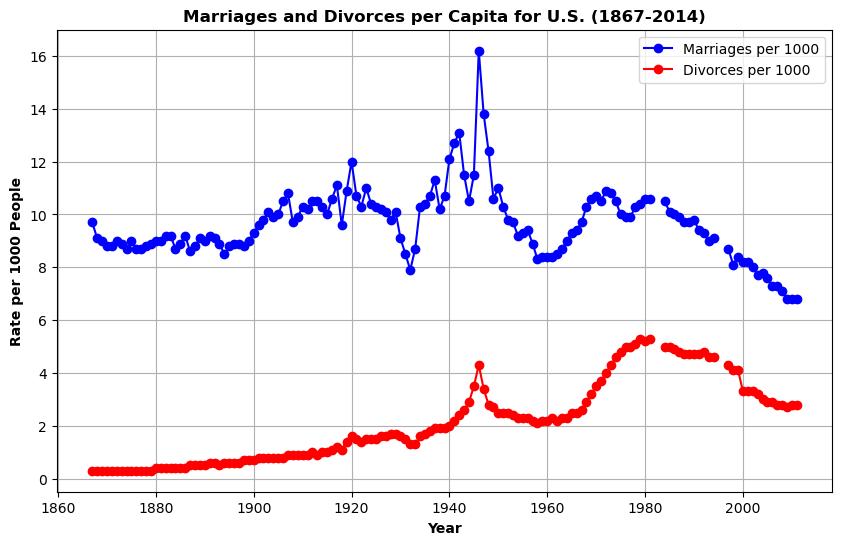

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data_file_path = "us-marriages-divorces-1867-2014.csv"
marriage_divorce_data = pd.read_csv(data_file_path)

# Step 2: Create a line plot for marriages and divorces data
plt.figure(figsize=(10, 6))  # Set the figure size

# Step 3: Plot the data as a line plot with changed line colors
plt.plot(marriage_divorce_data['Year'], marriage_divorce_data['Marriages_per_1000'], label='Marriages per 1000', marker='o', color='blue')
plt.plot(marriage_divorce_data['Year'], marriage_divorce_data['Divorces_per_1000'], label='Divorces per 1000', marker='o', color='red')

# Step 4: Set labels and title for the plot
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Rate per 1000 People', fontweight='bold')
plt.title('Marriages and Divorces per Capita for U.S. (1867-2014)', fontweight='bold')

# Step 5: Add legend to the plot
plt.legend()

# Step 6: Display the plot
plt.grid(True)
plt.show()


# Question 7

### Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.


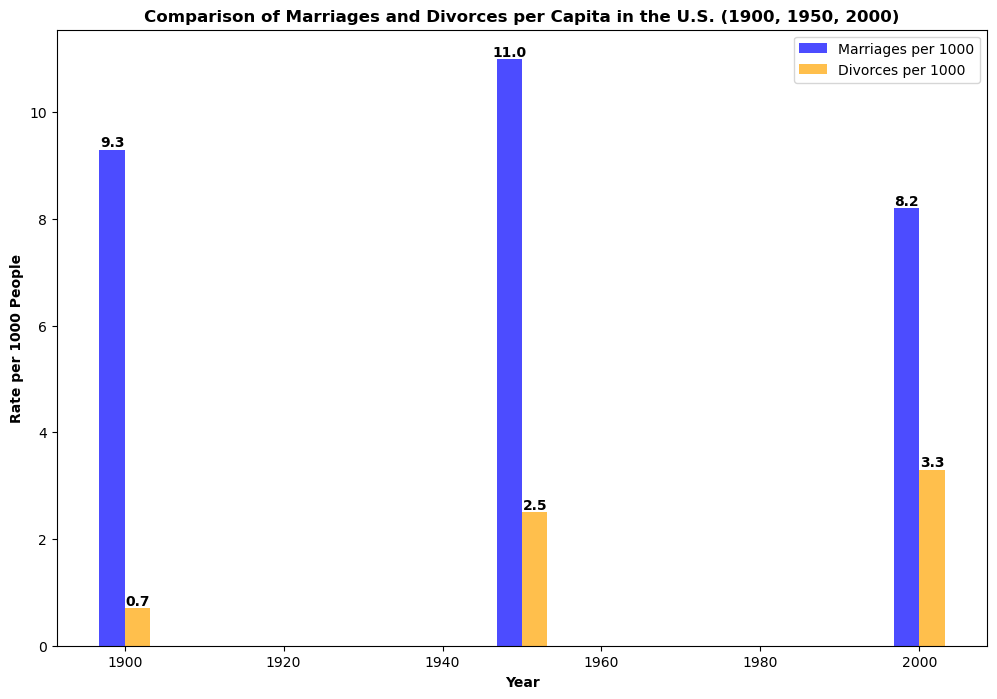

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = "us-marriages-divorces-1867-2014.csv"
data = pd.read_csv(file_path)

# Step 2: Selecting specific years for analysis
years_of_interest = [1900, 1950, 2000]
selected_years_data = data[data['Year'].isin(years_of_interest)]

# Step 3: Create a vertical bar chart with customized styles
plt.figure(figsize=(12, 8))  # Adjust the figure size

# Step 4: Define the width of the bars (increased by 8 times)
bar_width = 3.2

# Step 5: Plotting the data with different bar colors
marriages_bars = plt.bar(selected_years_data['Year'] - bar_width/2, selected_years_data['Marriages_per_1000'], width=bar_width, label='Marriages per 1000', alpha=0.7, color='blue')
divorces_bars = plt.bar(selected_years_data['Year'] + bar_width/2, selected_years_data['Divorces_per_1000'], width=bar_width, label='Divorces per 1000', alpha=0.7, color='orange')

# Step 6: Adding labels and title with appropriate formatting
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Rate per 1000 People', fontweight='bold')
plt.title('Comparison of Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)', fontweight='bold')

# Step 7: Adding a legend
plt.legend()

# Step 8: Adding numbers on top of the bars
for bar in marriages_bars + divorces_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

# Step 9: Display the plot
plt.show()


# Question 8

### Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. 

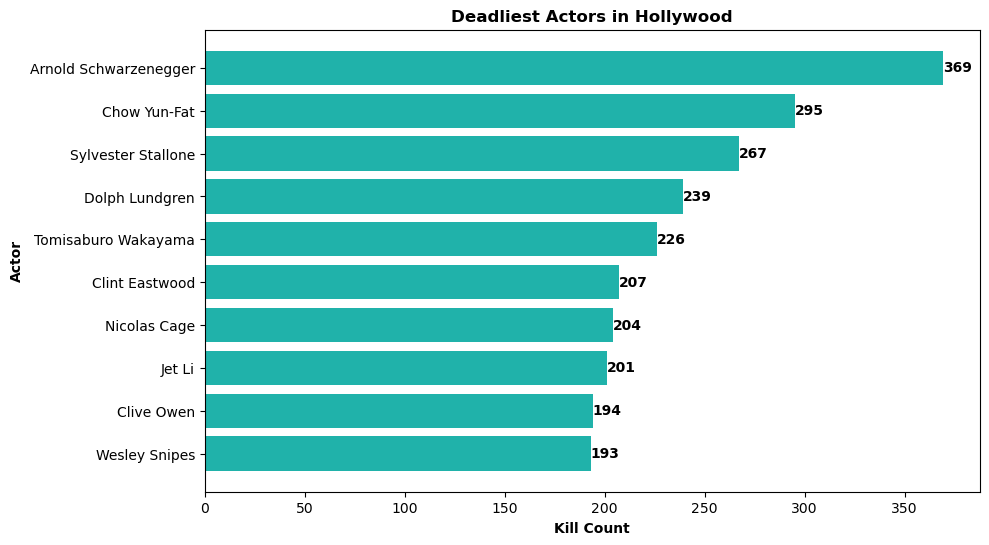

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = "actor_kill_counts.csv"
kill_counts_data = pd.read_csv(file_path)

# Step 2: Sort the data by kill count in ascending order
sorted_kill_counts = kill_counts_data.sort_values(by='Count', ascending=True)

# Step 3: Create a horizontal bar chart
plt.figure(figsize=(10, 6))  # Set the figure size

# Step 4: Plot the sorted kill count data with a different bar color
bar_color = 'lightseagreen'  # Set the desired color for the bars
plt.barh(sorted_kill_counts['Actor'], sorted_kill_counts['Count'], color=bar_color)

# Step 5: Set labels and title
plt.xlabel('Kill Count', fontweight='bold')
plt.ylabel('Actor', fontweight='bold')
plt.title('Deadliest Actors in Hollywood', fontweight='bold')

# Step 6: Add actor names as labels to the bars
for index, value in enumerate(sorted_kill_counts['Count']):
    plt.text(value, index, str(value), ha='left', va='center', fontweight='bold')

# Step 7: Display the plot
plt.show()



# Question 9

### Create a pie chart showing the fraction of all Roman Emperors that were assassinated.

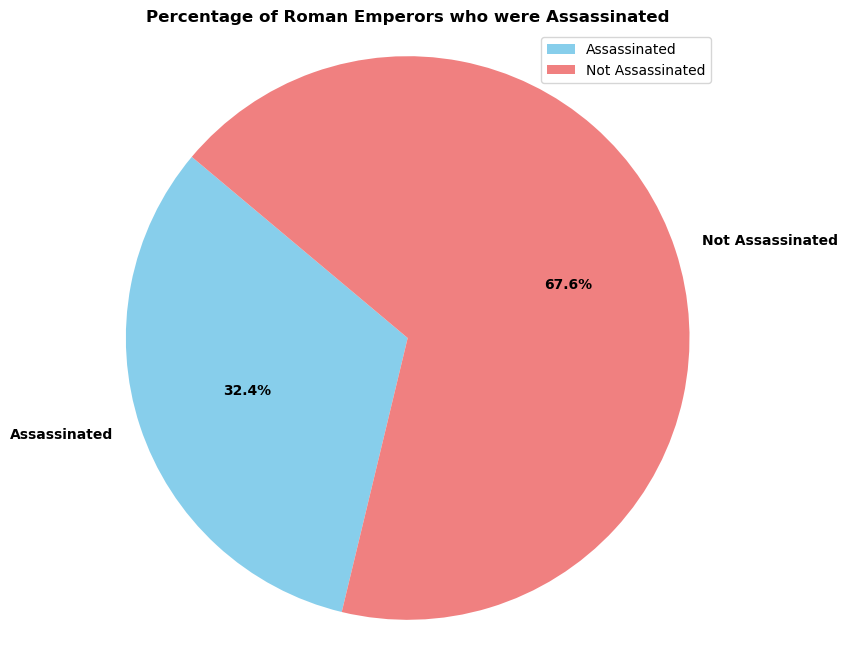

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data_file_path = "roman-emperor-reigns.csv"
emperor_data = pd.read_csv(data_file_path)

# Step 2: Calculate the number of emperors who were assassinated
assassinated_emperors = emperor_data[emperor_data['Cause_of_Death'] == 'Assassinated']
total_emperors = len(emperor_data)
assassinated_count = len(assassinated_emperors)

# Step 3: Calculate the percentage of emperors who were assassinated
percentage_assassinated = (assassinated_count / total_emperors) * 100

# Step 4: Create a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size

# Step 5: Plot the pie chart with different colors, labels, and legends
# Change the colors here
plt.pie([assassinated_count, total_emperors - assassinated_count], labels=['Assassinated', 'Not Assassinated'],
        colors=['skyblue', 'lightcoral'], autopct='%1.1f%%', startangle=140, textprops={'weight': 'bold'})

# Step 6: Maintain equal aspect ratio to ensure the pie chart is circular
plt.axis('equal')

# Step 7: Set the title for the pie chart
plt.title('Percentage of Roman Emperors who were Assassinated', fontweight='bold')

# Step 8: Add legends for the pie chart
plt.legend()

# Step 9: Display the pie chart
plt.show()


# Question 10

### Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.

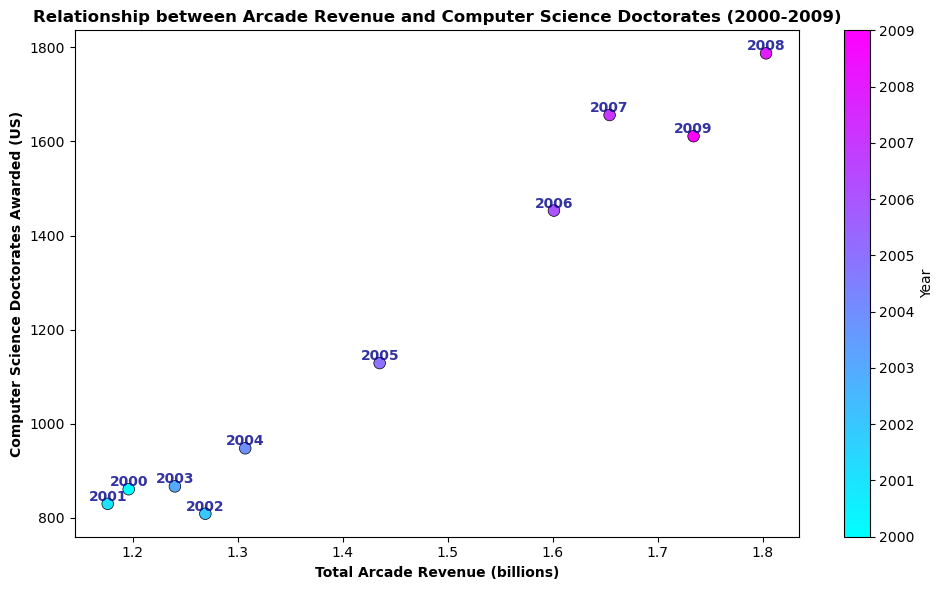

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the data from the CSV file
data_file_path = "arcade-revenue-vs-cs-doctorates.csv"
data = pd.read_csv(data_file_path)

# Step 2: Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))  # Set the size of the figure

# Step 3: Plot the data points with modified colors and spacing
scatter_plot = plt.scatter(data['Total Arcade Revenue (billions)'], data['Computer Science Doctorates Awarded (US)'],
                           c=data['Year'], cmap='cool', edgecolors='black', linewidths=0.5, s=70)  # Adjust colors, edges, and size

# Step 4: Set labels and title for the plot with bold formatting
plt.xlabel('Total Arcade Revenue (billions)', fontweight='bold')
plt.ylabel('Computer Science Doctorates Awarded (US)', fontweight='bold')
plt.title('Relationship between Arcade Revenue and Computer Science Doctorates (2000-2009)', fontweight='bold')

# Step 5: Add the corresponding year as text to each data point with adjusted spacing
for i, year in enumerate(data['Year']):
    plt.text(data['Total Arcade Revenue (billions)'][i], data['Computer Science Doctorates Awarded (US)'][i], str(year),
             fontsize=10, ha='center', va='bottom', fontweight='bold', color='darkblue', alpha=0.8)  # Adjust font color and transparency

# Step 6: Add a colorbar to show the mapping of colors to years
colorbar = plt.colorbar(scatter_plot)
colorbar.set_label('Year')

# Step 7: Display the scatter plot
plt.tight_layout()  # Add some spacing to ensure labels and markers are not cut off
plt.show()
